# Recreate the Tesla Cybertruck with Matplotlib

In this challenge, you will recreate the new [Tesla Cybertruck][0] unveiled last week using matplotlib.

![](../images/tesla.png)

[0]: https://www.tesla.com/cybertruck

### Challenge

Use matplotlib to recreate the image directly above. The above image was created by [Lynn Fisher][0] without using matplotlib.

### Extra Challenge

Add animation so that it drives off the screen.

[0]: https://twitter.com/lynnandtonic/status/1197989912970067969

## Solution

Before going into detail, let's jump to the results. Here is the completed recreation of the Tesla Cybertruck that drives off the screen. 

<video controls src="../images/tesla_animate.mp4" />

### Tutorial

A tutorial will now follow that describes the recreation. It will discuss the following:


* Figure and Axes setup
* Adding shapes
* Color gradients
* Animation

Understanding these topics should give you enough to start animating your own figures in matplotlib.

### Figure and Axes setup

We first create a matplotlib Figure without any Axes (the plotting surface). The function `create_axes`, adds an Axes to the Figure, sets the x-limits to be twice the y-limits (to match the ratio of the figure dimensions (16 x 8)), fills in the background with two different dark colors using `fill_between`, and  adds grid lines to make it easier for you to plot the objects in the exact place you desire. Set the `draft` parameter to `False` when you want to remove the grid lines, tick marks, and tick labels.

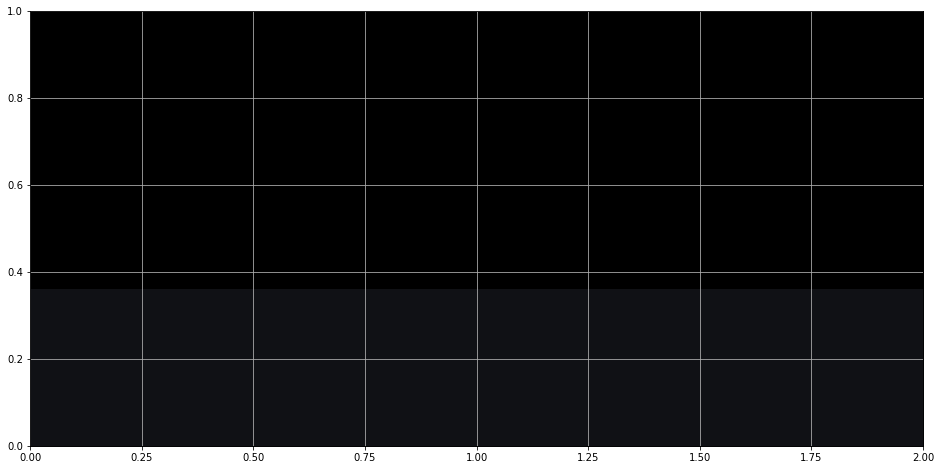

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.Figure(figsize=(16, 8))

def create_axes(draft=True):
    ax = fig.add_subplot()
    ax.grid(True)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 2)
    ax.fill_between(x=[0, 2], y1=.36, y2=1, color='black')
    ax.fill_between(x=[0, 2], y1=0, y2=.36, color='#101115')
    if not draft:
        ax.grid(False)
        ax.axis('off')
        
create_axes()
fig

### Shapes in matplotlib

Most of the Cybertruck is composed of shapes (patches in matplotlib terminology) - circles, rectangles, and polygons. These shapes are available in the patches matplotlib module. After importing, we instantiate single instances of these patches and then call the `add_patch` method to add the patch to the Axes.

For the Cybertruck, I used three patches, `Polygon`, `Rectangle`, and `Circle`. They each have different parameters available in their constructor. I first constructed the body of the car as four polygons. Two other polygons were used for the rims. Each polygon is provided a list of x, y coordinates where the corner points are located. Matplotlib connects all the points in the order given and fills it in with the provided color. 

Notice how the Axes is retrieved as the first line of the function. This is used throughout the tutorial.

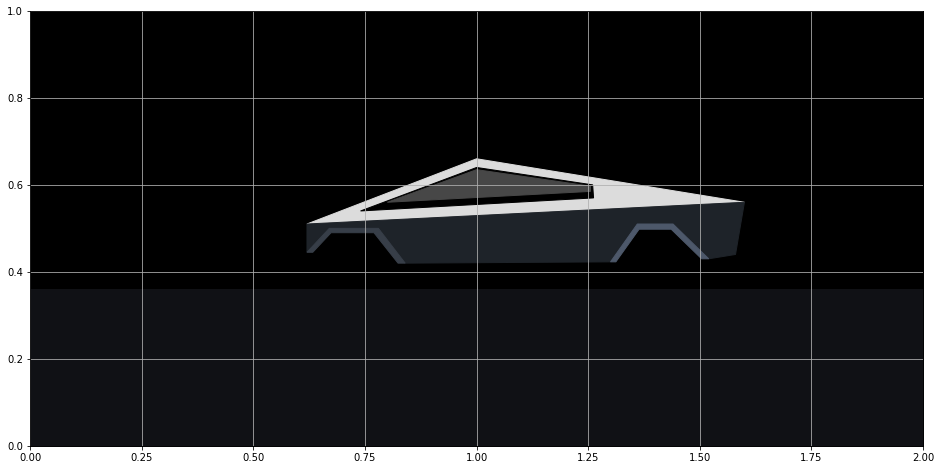

In [2]:
from matplotlib.patches import Polygon, Rectangle, Circle

def create_body():
    ax = fig.axes[0]
    top = Polygon([[.62, .51], [1, .66], [1.6, .56]], color='#DCDCDC')
    windows = Polygon([[.74, .54], [1, .64], [1.26, .6], [1.262, .57]], color='black')
    windows_bottom = Polygon([[.8, .56], [1, .635], [1.255, .597], [1.255, .585]], color='#474747')
    base = Polygon([[.62, .51], [.62, .445], [.67, .5], [.78, .5], [.84, .42], 
                    [1.3, .423], [1.36, .51], [1.44, .51], [1.52, .43], [1.58, .44], 
                    [1.6, .56]], color="#1E2329")
    left_rim = Polygon([[.62, .445], [.67, .5], [.78, .5], [.84, .42], 
                        [.824, .42], [.77, .49],[.674, .49], [.633, .445]], color='#373E48')
    right_rim = Polygon([[1.3, .423], [1.36, .51], [1.44, .51], [1.52, .43], 
                             [1.504, .43], [1.436, .498], [1.364, .498], [1.312, .423]], color='#4D586A')
    ax.add_patch(top)
    ax.add_patch(windows)
    ax.add_patch(windows_bottom)
    ax.add_patch(base)
    ax.add_patch(left_rim)
    ax.add_patch(right_rim)

create_body()
fig

#### Tires

I used three `Circle` patches for each of the tires. You must provide the center and radius. For the innermost circles (the "spokes"), I've set the `zorder` to 99. The `zorder` determines the order of how plotting objects are layered on top of each other. The higher the number, the higher up on the stack of layers the object will be plotted. During the next step, we will draw some rectangles through the tires and they need to be plotted underneath these spokes.

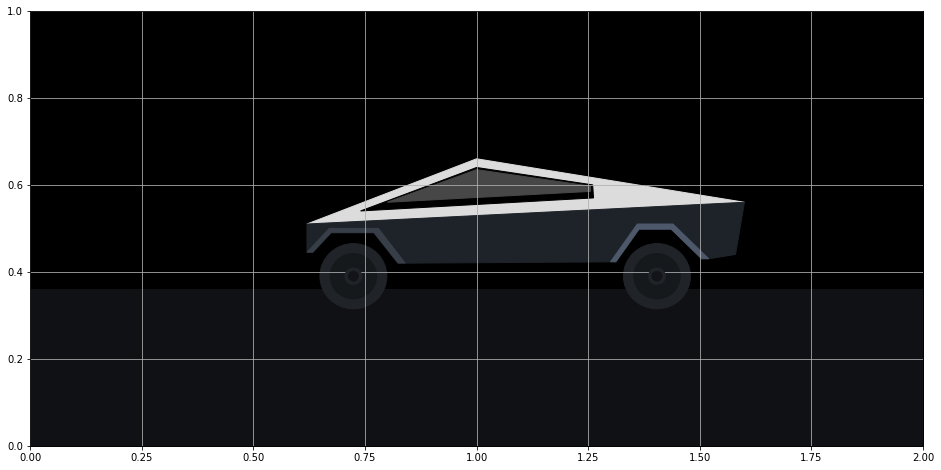

In [3]:
def create_tires():
    ax = fig.axes[0]
    left_tire = Circle((.724, .39), radius=.075, color="#202328")
    right_tire = Circle((1.404, .39), radius=.075, color="#202328")
    left_inner_tire = Circle((.724, .39), radius=.052, color="#15191C")
    right_inner_tire = Circle((1.404, .39), radius=.052, color="#15191C")
    left_spoke = Circle((.724, .39), radius=.019, color="#202328", zorder=99)
    right_spoke = Circle((1.404, .39), radius=.019, color="#202328", zorder=99)
    left_inner_spoke = Circle((.724, .39), radius=.011, color="#131418", zorder=99)
    right_inner_spoke = Circle((1.404, .39), radius=.011, color="#131418", zorder=99)

    ax.add_patch(left_tire)
    ax.add_patch(right_tire)
    ax.add_patch(left_inner_tire)
    ax.add_patch(right_inner_tire)
    ax.add_patch(left_spoke)
    ax.add_patch(right_spoke)
    ax.add_patch(left_inner_spoke)
    ax.add_patch(right_inner_spoke)

create_tires()
fig

#### Axels

I used the `Rectangle` patch to represent the two 'axels' (this isn't the correct term, but you'll see what I mean) going through the tires. You must provide a coordinate for the lower left corner and a width and a height. You can also provide it an angle (in degrees) to further control its position. Notice that they go under the spokes, plotted from above. This is due to their lower `zorder`.

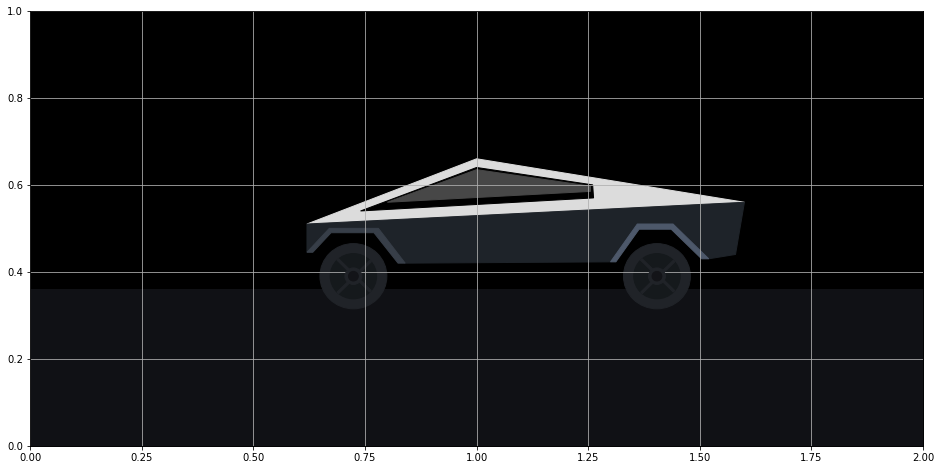

In [4]:
def create_axels():
    ax = fig.axes[0]
    left_left_axel = Rectangle((.687, .427), width=.104, height=.005, angle=315, color='#202328')
    left_right_axel = Rectangle((.761, .427), width=.104, height=.005, angle=225, color='#202328')
    right_left_axel = Rectangle((1.367, .427), width=.104, height=.005, angle=315, color='#202328')
    right_right_axel = Rectangle((1.441, .427), width=.104, height=.005, angle=225, color='#202328')
    
    ax.add_patch(left_left_axel)
    ax.add_patch(left_right_axel)
    ax.add_patch(right_left_axel)
    ax.add_patch(right_right_axel)

create_axels()
fig

#### Other details

The front bumper, head light, tail light, door and window lines are added below. I used regular matplotlib lines for some of these. Those lines are not patches and get added directly to the Axes without any other additional method.

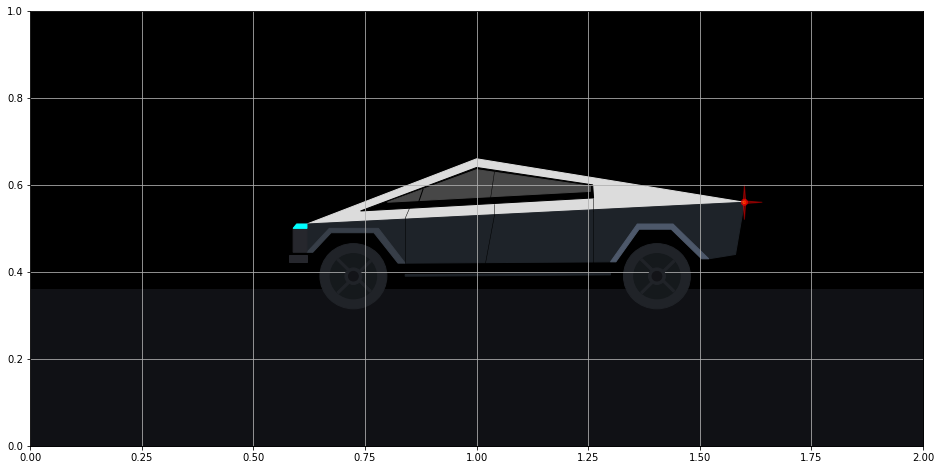

In [5]:
def create_other_details():
    ax = fig.axes[0]
    # other details
    front = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .445], [.62, .445]], color='#26272d')
    front_bottom = Polygon([[.62, .438], [.58, .438], [.58, .423], [.62, .423]], color='#26272d')
    head_light = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .5], [.62, .5]], color='aqua')
    step = Polygon([[.84, .39], [.84, .394], [1.3, .397], [1.3, .393]], color='#1E2329')

    # doors
    ax.plot([.84, .84], [.42, .523], color='black', lw=.5)
    ax.plot([1.02, 1.04], [.42, .53], color='black', lw=.5)
    ax.plot([1.26, 1.26], [.42, .54], color='black', lw=.5)
    ax.plot([.84, .85], [.523, .547], color='black', lw=.5)
    ax.plot([1.04, 1.04], [.53, .557], color='black', lw=.5)
    ax.plot([1.26, 1.26], [.54, .57], color='black', lw=.5)

    # window lines
    ax.plot([.87, .88], [.56, .59], color='black', lw=1)
    ax.plot([1.03, 1.04], [.56, .63], color='black', lw=.5)

    # tail light
    tail_light = Circle((1.6, .56), radius=.007, color='red', alpha=.6)
    tail_light_center = Circle((1.6, .56), radius=.003, color='yellow', alpha=.6)
    tail_light_up = Polygon([[1.597, .56], [1.6, .6], [1.603, .56]], color='red', alpha=.4)
    tail_light_right = Polygon([[1.6, .563], [1.64, .56], [1.6, .557]], color='red', alpha=.4)
    tail_light_down = Polygon([[1.597, .56], [1.6, .52], [1.603, .56]], color='red', alpha=.4)

    ax.add_patch(front)
    ax.add_patch(front_bottom)
    ax.add_patch(head_light)
    ax.add_patch(step)
    ax.add_patch(tail_light)
    ax.add_patch(tail_light_center)
    ax.add_patch(tail_light_up)
    ax.add_patch(tail_light_right)
    ax.add_patch(tail_light_down)

create_other_details()
fig

#### Color gradients for the head light beam

The head light beam has a distinct color gradient that dissipates into the night sky. This is challenging to complete. I found an [excellent answer on Stack Overflow from user Joe Kington][0] on how to do this. We begin by using the `imshow` function which creates images from 3-dimensional arrays. We create a 1 x 100 x 4 array that represents 1 x 100 points of RGBA (red, geren, blue, alpha) values. Every point has the same red, green, and blue values of (0, 1, 1) which represents the color alpha, but has an alpha value that ranges from 0 to 1. The further from the head light, the smaller the alpha. The alpha represents opacity. The opacity slowly decreases until it reaches 0. The `extent` parameter controls the rectangular region (xmin, xmax, ymin, ymax) where the image will be shown.

[0]: https://stackoverflow.com/questions/29321835/is-it-possible-to-get-color-gradients-under-curve-in-matplotlib

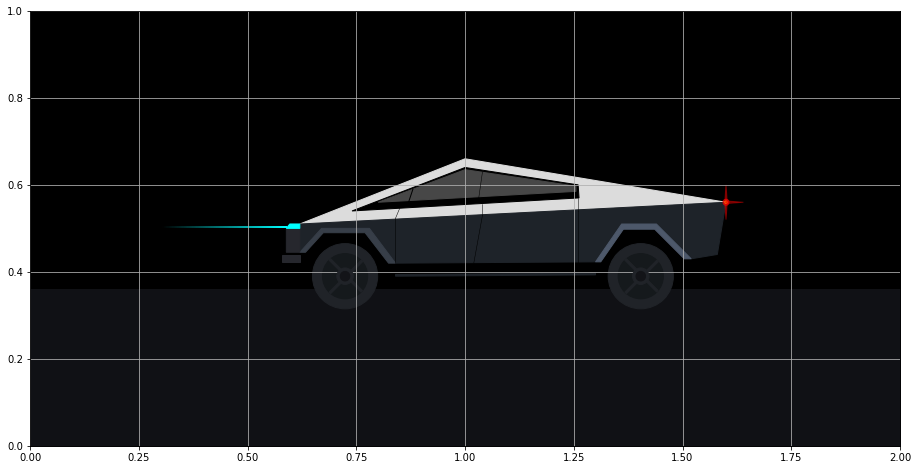

In [6]:
import matplotlib.colors as mcolors

def create_headlight_beam():
    ax = fig.axes[0]
    z = np.empty((1, 100, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb('aqua')
    alphas = np.linspace(0, 1, 100)
    z[:, :, :3] = rgb
    z[:, :, -1] = alphas
    im = ax.imshow(z, extent=[.3, .589, .501, .505], zorder=1)
    
create_headlight_beam()
fig

#### Headlight Cloud

The cloud of points surrounding the headlight beam is even more challenging to complete. This time, a 100 x 100 grid of points was used to control the opacity. The opacity was directly proportional to the vertical distance from the center beam. Additionally, if a point was outside of the diagonal of the rectangle defined by `extent`, its opacity was set to 0 (invisible).

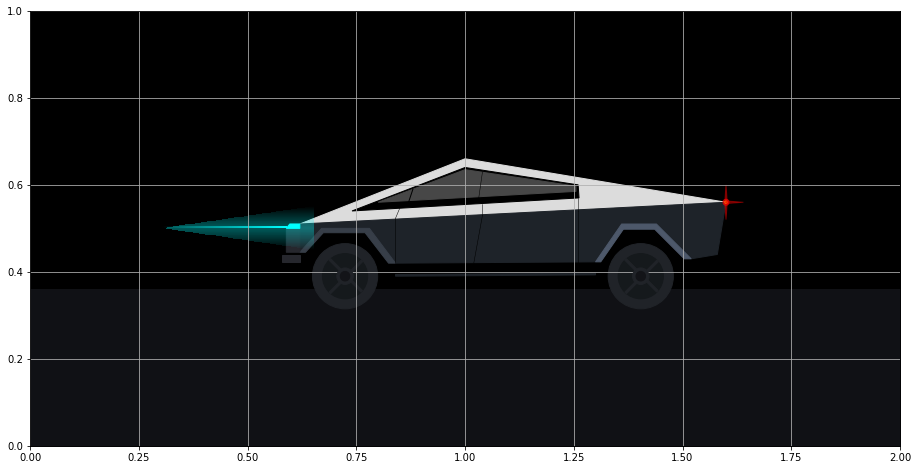

In [7]:
def create_headlight_cloud():
    ax = fig.axes[0]
    z2 = np.empty((100, 100, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb('aqua')
    z2[:, :, :3] = rgb
    for j, x in enumerate(np.linspace(0, 1, 100)):
        for i, y in enumerate(np.abs(np.linspace(-.2, .2, 100))):
            if x * .2 > y:
                z2[i, j, -1] = 1 - (y + .8) ** 2
            else:
                z2[i, j, -1] = 0
    im2 = ax.imshow(z2, extent=[.3, .65, .45, .55], zorder=1)

create_headlight_cloud()
fig

### Creating a Function to Draw the Car

All of our work from above can be placed in a function that draws the car. This will be used when initializing our animation. Notice, that the first line clears the Figure which removes our Axes. Since this is our final product, we set `draft` to `False`.

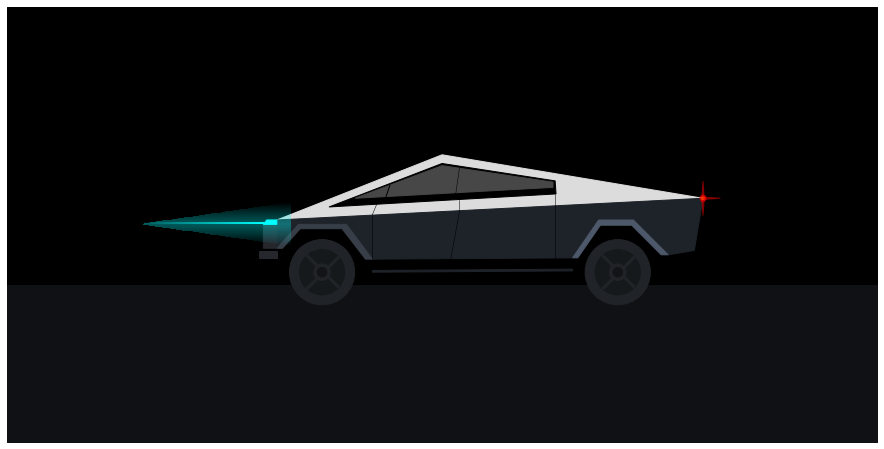

In [11]:
def draw_car():
    fig.clear()
    create_axes(draft=False)
    create_body()
    create_tires()
    create_axels()
    create_other_details()
    create_headlight_beam()
    create_headlight_cloud()
    
draw_car()
fig

## Animation

Animation in matplotlib is fairly straightforward. You must create a function that updates the position of the objects in your figure for every frame. This function is called repeatedly for each frame that you create.

In the `update` function below, we loop through each patch, line, and image in our Axes and reduce the x-value of each plotted object by .015. This has the effect of moving the truck to the left. The trickiest part was changing the x and y values for the rectangular tire 'axels'. Some basic trigonometry helps calculate this.

Implicitly, matplotlib pass the update function the frame number as an integer as the first argument. We accept this input as the parameter `frame_number`. We only use it in one place, and that is to do nothing during the first frame.

Finally, the `FuncAnimation` class from the animation module is used to construct the animation. We provide it our  function to update the Figure (`update`), a function to initialize the Figure (`draw_car`) along with the original Figure itself, number of frames, and any extra arguments used during update (`fargs`).

In [12]:
from matplotlib.animation import FuncAnimation

def update(frame_number, x_delta, radius, angle):
    if frame_number == 0:
        return
    ax = fig.axes[0]
    for patch in ax.patches:
        if isinstance(patch, Polygon):
            arr = patch.get_xy()
            arr[:, 0] -= x_delta
        elif isinstance(patch, Circle):
            x, y = patch.get_center()
            patch.set_center((x - x_delta, y))
        elif isinstance(patch, Rectangle):
            xd_old = -np.cos(np.pi * patch.angle / 180) * radius
            yd_old = -np.sin(np.pi * patch.angle / 180) * radius
            patch.angle += angle
            xd = -np.cos(np.pi * patch.angle / 180) * radius
            yd = -np.sin(np.pi * patch.angle / 180) * radius
            x = patch.get_x()
            y = patch.get_y()
            x_new = x - x_delta + xd - xd_old
            y_new = y + yd - yd_old
            patch.set_x(x_new)
            patch.set_y(y_new)
        
    for line in ax.lines:
        xdata = line.get_xdata()
        line.set_xdata(xdata - x_delta)
        
    for image in ax.images:
        extent = image.get_extent()
        extent[0] -= x_delta
        extent[1] -= x_delta
        
animation = FuncAnimation(fig, update, init_func=draw_car, frames=110,
                          repeat=False, fargs=(.015, .052, 4))

### Save animation

Finally, we can save the animation as an mp4 file (assuming you have ffmpeg). We set the frames-per-second (`fps`) to 30. From above, the total number of frames is 110 (enough to move the truck off the screen) so the video will last nearly four seconds. The html video tag is used in the markdown to display the animation.

In [13]:
animation.save('../images/tesla_animate.mp4', fps=30, bitrate=3000)

<video controls src="../images/tesla_animate.mp4" />